<a href="https://colab.research.google.com/github/tammavarapu/tensorflow_exp/blob/main/tensorflow_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf

In [7]:
print(f"Tenserflow version :{tf.__version__}")
print(f"Keras version :{tf.keras.__version__}")

Tenserflow version :2.3.0
Keras version :2.4.0


In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [21]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
print(f"data type of X_train_full : {X_train_full.dtype}\nShape of X_train_full : {X_train_full.shape}")

data type of X_train_full : uint8
Shape of X_train_full : (60000, 28, 28)


In [25]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255.

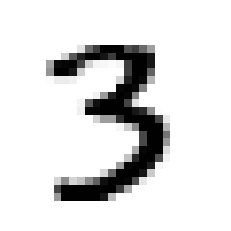

In [26]:
#Lets view the first data point of X_train
plt.imshow(X_train[5000],cmap='binary')
plt.axis('off')
plt.show()

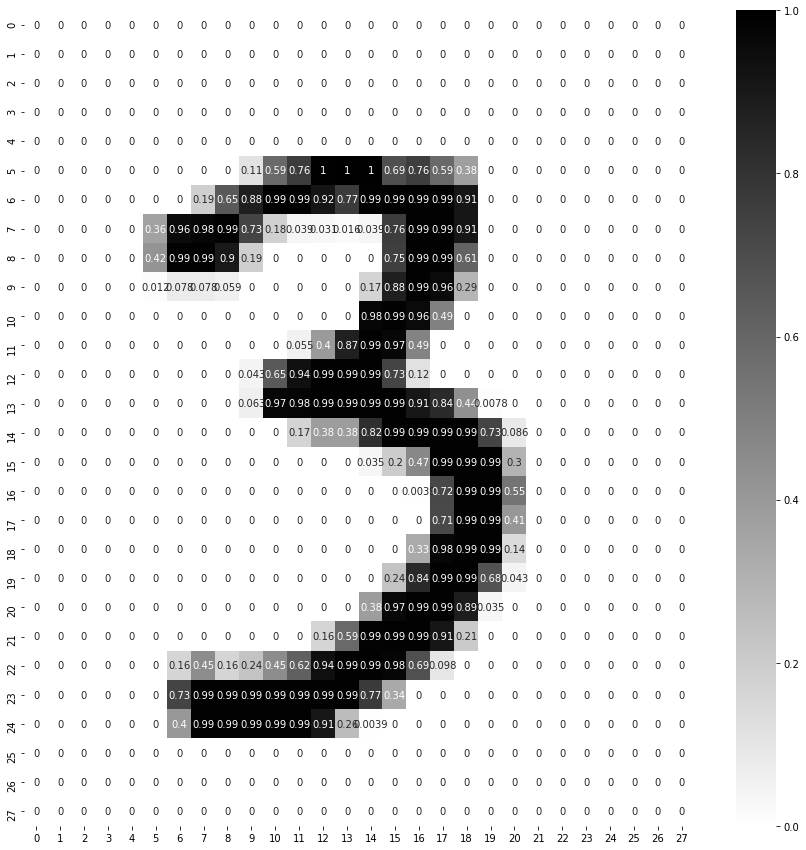

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[5000],annot=True,cmap="binary")

In [29]:
y_train.shape

(55000,)

In [30]:
X_train.shape

(55000, 28, 28)

In [31]:
# create ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [32]:
model_clf.layers

In [33]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
for lr in model_clf.layers:
  print(lr.name)

inputlayer
hiddenlayer1
hiddenlayer2
outputlayer


In [41]:
#model_clf.get_layer(lr.name) is hiddenlayer1

In [39]:
lr.get_weights()

[array([[ 2.79803872e-02,  1.39750302e-01, -1.53935507e-01,
          1.36167079e-01, -5.08019328e-03, -6.12045676e-02,
         -1.15456946e-01, -3.58818620e-02, -1.48445427e-01,
          7.56172240e-02],
        [-1.24301180e-01,  4.58120704e-02, -5.38421124e-02,
         -1.66750014e-01, -1.66104436e-02, -4.94583249e-02,
          1.84131294e-01,  1.34729743e-01,  1.79619193e-02,
          2.08310544e-01],
        [ 1.27104193e-01,  6.46945238e-02, -1.12654001e-01,
          2.19965279e-02, -5.68454564e-02, -1.29043445e-01,
          1.32795066e-01,  1.22822762e-01,  1.79104269e-01,
         -2.14928657e-01],
        [-2.97475308e-02, -3.19632441e-02, -9.67203677e-02,
         -2.12595165e-01, -1.25169098e-01,  3.59705687e-02,
          1.20805830e-01,  1.42591745e-01,  1.20939106e-01,
          1.82546228e-01],
        [-5.93993366e-02,  2.05371976e-02, -2.25001678e-01,
         -1.36778697e-01,  7.67643452e-02, -2.27502331e-01,
          1.91705346e-01, -1.58854455e-01, -1.534930

In [43]:
type(lr.get_weights())

list

In [44]:
w,b = lr.get_weights()

In [45]:
w

array([[ 2.79803872e-02,  1.39750302e-01, -1.53935507e-01,
         1.36167079e-01, -5.08019328e-03, -6.12045676e-02,
        -1.15456946e-01, -3.58818620e-02, -1.48445427e-01,
         7.56172240e-02],
       [-1.24301180e-01,  4.58120704e-02, -5.38421124e-02,
        -1.66750014e-01, -1.66104436e-02, -4.94583249e-02,
         1.84131294e-01,  1.34729743e-01,  1.79619193e-02,
         2.08310544e-01],
       [ 1.27104193e-01,  6.46945238e-02, -1.12654001e-01,
         2.19965279e-02, -5.68454564e-02, -1.29043445e-01,
         1.32795066e-01,  1.22822762e-01,  1.79104269e-01,
        -2.14928657e-01],
       [-2.97475308e-02, -3.19632441e-02, -9.67203677e-02,
        -2.12595165e-01, -1.25169098e-01,  3.59705687e-02,
         1.20805830e-01,  1.42591745e-01,  1.20939106e-01,
         1.82546228e-01],
       [-5.93993366e-02,  2.05371976e-02, -2.25001678e-01,
        -1.36778697e-01,  7.67643452e-02, -2.27502331e-01,
         1.91705346e-01, -1.58854455e-01, -1.53493047e-01,
        -2.

In [46]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [65]:
EPOCHS=50
VALIDATION_SET=(X_valid,y_valid)

history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)


Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0061 - accuracy: 0.9997 - val_loss: 0.0689 - val_accuracy: 0.9804
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.0699 - val_accuracy: 0.9806
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0693 - val_accuracy: 0.9808
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9998 - val_loss: 0.0698 - val_accuracy: 0.9808
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.0694 - val_accuracy: 0.9808
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0697 - val_accuracy:

In [66]:
history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [67]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.006406,0.999673,0.069276,0.9794
1,0.006137,0.999727,0.068875,0.9804
2,0.005918,0.999709,0.069931,0.9806
3,0.005730,0.999709,0.069250,0.9808
4,0.005488,0.999836,0.069771,0.9808
5,0.005309,0.999800,0.069387,0.9808
6,0.005115,0.999800,0.069663,0.9808
7,0.004952,0.999800,0.069857,0.9808
8,0.004757,0.999836,0.069756,0.9790
9,0.004612,0.999873,0.069709,0.9804


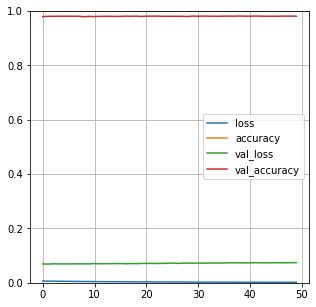

In [71]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
model_clf.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9808


[0.07436888664960861, 0.9807999730110168]

In [76]:
X_new  = X_valid[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [78]:
y_pred = np.argmax(model_clf.predict(X_new),axis=1)
y_pred

array([5, 0, 4])

In [79]:
y_test_new = y_test[:3]

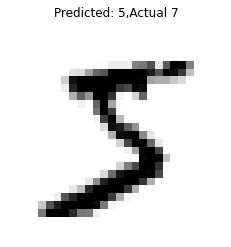

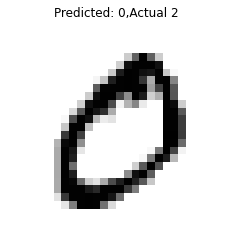

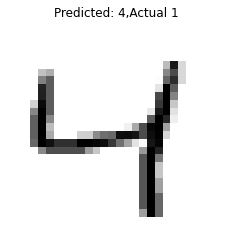

In [80]:
for data,pred,actual in zip(X_new,y_pred,y_test_new):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted: {pred},Actual {actual}")
  plt.axis("off")
  plt.show()